## Import Libraries

In [53]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

## Load the Data

In [54]:
df = pd.read_csv("Data/data_saudi_used_cars.csv")

In [55]:
df.shape

(5624, 11)

In [56]:
df.head(2)

Type  Region    Make  Gear_Type Origin   Options  Year  Engine_Size  \
0  Corolla    Abha  Toyota     Manual  Saudi  Standard  2013          1.4   
1    Yukon  Riyadh     GMC  Automatic  Saudi      Full  2014          8.0   

   Mileage  Negotiable   Price  
0   421000        True       0  
1    80000       False  120000

## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [57]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

Empty DataFrame
Columns: [Type, Region, Make, Gear_Type, Origin, Options, Year, Engine_Size, Mileage, Negotiable, Price]
Index: []

In [58]:
# Completeness
df.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

In [59]:
# Accurecy types
df.dtypes

Type            object
Region          object
Make            object
Gear_Type       object
Origin          object
Options         object
Year             int64
Engine_Size    float64
Mileage          int64
Negotiable        bool
Price            int64
dtype: object

In [60]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
categorical_features = ['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options']
numeric_features = ['Year', 'Engine_Size', 'Mileage']

In [61]:
for i in categorical_features:
    print (df[i].value_counts())

Type
Land Cruiser    269
Camry           233
Hilux           207
Accent          174
Yukon           162
               ... 
Nativa            1
360               1
GC7               1
CT5               1
S8                1
Name: count, Length: 347, dtype: int64
Region
Riyadh            2270
Dammam             924
Jeddah             732
Qassim             225
Al-Medina          214
Al-Ahsa            166
Aseer              163
Makkah             153
Taef               103
Tabouk              97
Khobar              76
Abha                64
Jazan               60
Hail                58
Jubail              56
Najran              42
Hafar Al-Batin      39
Al-Baha             35
Yanbu               27
Al-Jouf             27
Arar                22
Besha               16
Qurayyat            13
Al-Namas            12
Wadi Dawasir        12
Sakaka              10
Sabya                4
Name: count, dtype: int64
Make
Toyota          1430
Hyundai          668
Ford             530
Chevrolet     

In [62]:
df = df[df['Year']>=2000]

In [63]:
# Calculate the frequency of each 'Type'
type_counts = df['Type'].value_counts()

# Filter 'Type' values that appear 10 or more times
df = df[df['Type'].isin(type_counts[type_counts >= 2].index)]

In [64]:
df.shape

(5364, 11)

In [65]:
# Calculate the frequency of each 'Make'
make_counts = df['Make'].value_counts()

# Filter 'Type' values that appear 10 or more times
df = df[df['Make'].isin(make_counts[make_counts >=2].index)]

In [66]:
df.shape

(5364, 11)

In [67]:
#df[df['Type']=='Other']

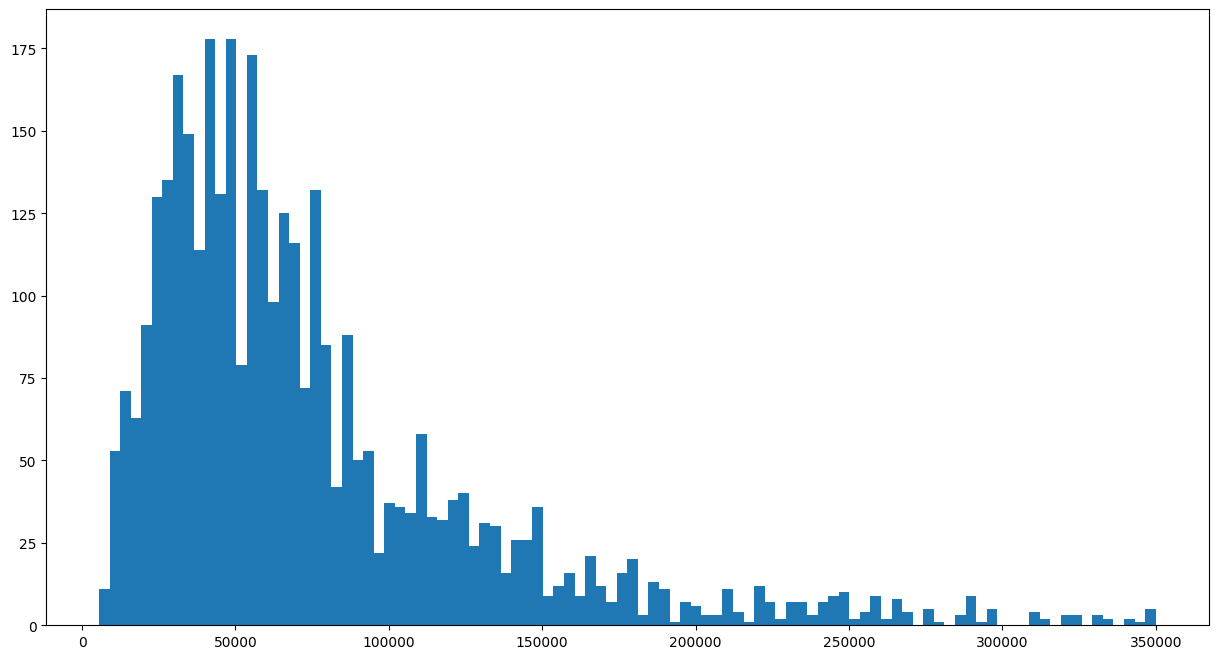

In [68]:
plt.figure(figsize=(15,8))
# plt.boxplot(df['Price']);
plt.hist(df[(df['Price']<=350000) & (df['Price']>5000)]['Price'], bins=100);
#plt.hist(df[(df['Price']<=400000) & (df['Price']>=5000)]['Price'], bins=100);

In [69]:
df = df[(df['Price']<=350000) & (df['Price']>=5000)]

In [70]:
df.shape

(3566, 11)

In [71]:
#df[df['Mileage']<1000]

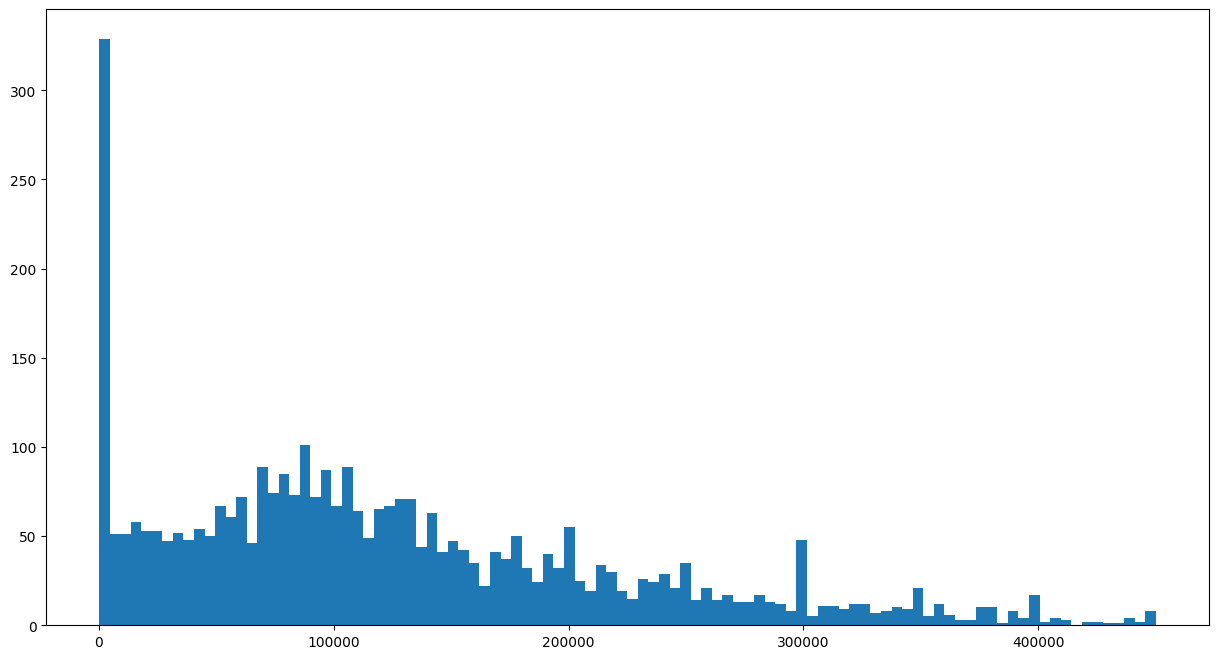

In [72]:
plt.figure(figsize=(15,8))
#plt.boxplot(df['Mileage']);
plt.hist(df[df['Mileage']<=450000]['Mileage'], bins=100);
#plt.hist(df['Mileage'], bins=100);

In [73]:
df = df[df['Mileage']<=450000]
df.shape

(3511, 11)

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [74]:
df.head(2)

Type  Region        Make  Gear_Type       Origin Options  Year  \
1        Yukon  Riyadh         GMC  Automatic        Saudi    Full  2014   
2  Range Rover  Riyadh  Land Rover  Automatic  Gulf Arabic    Full  2015   

   Engine_Size  Mileage  Negotiable   Price  
1          8.0    80000       False  120000  
2          5.0   140000       False  260000

In [75]:
df.shape

(3511, 11)

In [76]:
df.head(2)

Type  Region        Make  Gear_Type       Origin Options  Year  \
1        Yukon  Riyadh         GMC  Automatic        Saudi    Full  2014   
2  Range Rover  Riyadh  Land Rover  Automatic  Gulf Arabic    Full  2015   

   Engine_Size  Mileage  Negotiable   Price  
1          8.0    80000       False  120000  
2          5.0   140000       False  260000

#### 3. Feature selection

In [77]:
df = df[['Engine_Size', 'Mileage', 'Price']]

In [78]:
df.head(2)

Engine_Size  Mileage   Price
1          8.0    80000  120000
2          5.0   140000  260000

#### 4. Prepare train and test data

In [79]:
# Prepare data
X = df


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [80]:
X.shape


(3511, 3)

## Buliding the Model

In [81]:
wcss = []
for i in range(1, 20):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS


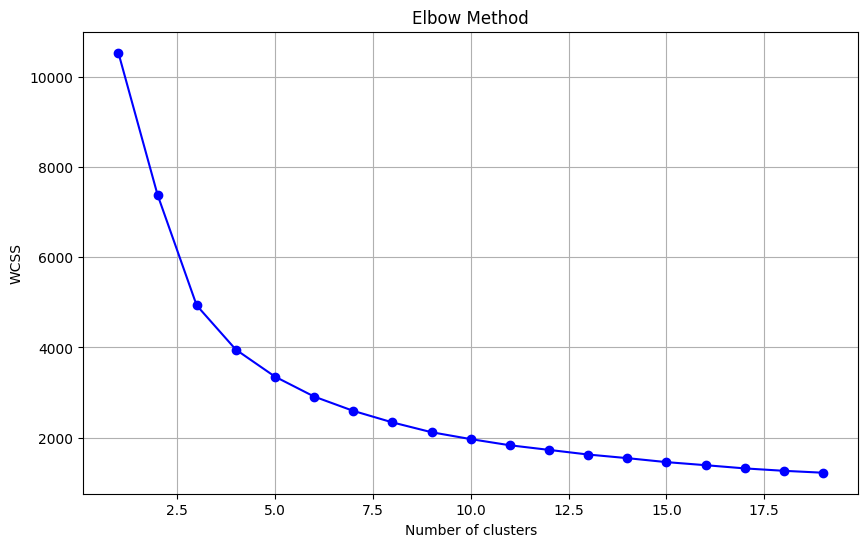

In [82]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [83]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 3 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

## Train and Test the Model

In [84]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

## Evaluating the Model 

In [85]:
X.head(2)

Engine_Size  Mileage   Price
1          8.0    80000  120000
2          5.0   140000  260000

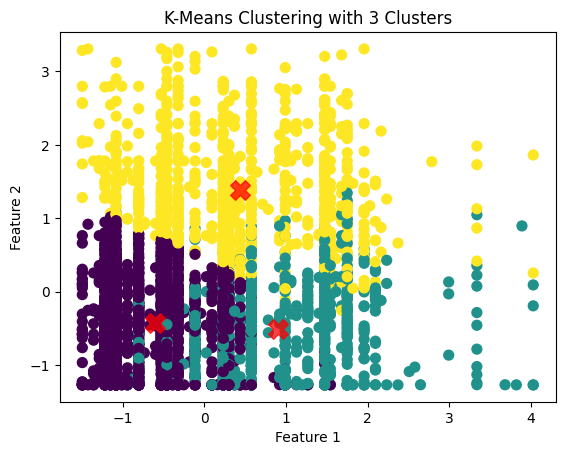

In [86]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [87]:
X['kmeans'] = y_pred

In [88]:
X['kmeans'].value_counts()

kmeans
0    1838
2     870
1     803
Name: count, dtype: int64

In [89]:
X[X['kmeans']==0]

Engine_Size  Mileage   Price  kmeans
5             2.0    25000   58000       0
7             2.4      155   48000       0
8             3.5   110864   81500       0
18            2.0    85000   65000       0
20            1.4      290    7000       0
...           ...      ...     ...     ...
5612          3.5      447   21000       0
5613          3.5   123000   65000       0
5615          2.5   106000   56000       0
5616          2.0     9500  132000       0
5619          2.5    78794   68000       0

[1838 rows x 4 columns]

<Axes: xlabel='Price', ylabel='Engine_Size'>

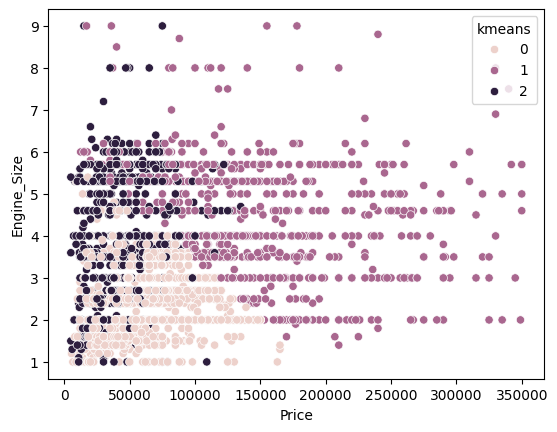

In [90]:
sns.scatterplot(data = X , x = 'Price', y = 'Engine_Size', hue = 'kmeans')

<Axes: xlabel='Mileage', ylabel='Price'>

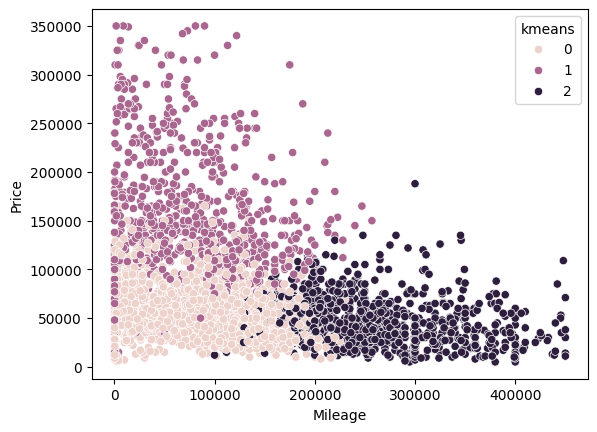

In [91]:
sns.scatterplot(data = X , x = 'Mileage', y = 'Price', hue = 'kmeans')

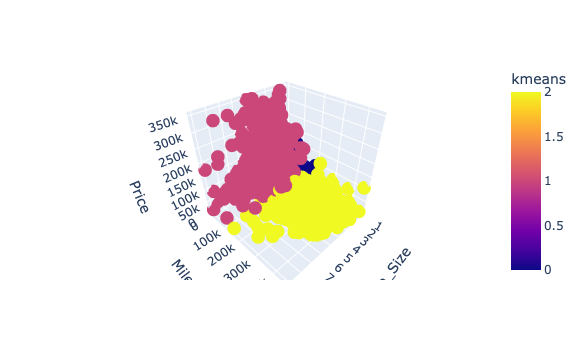

In [94]:

import plotly
import plotly.express as px

fig = px.scatter_3d(X, x='Engine_Size', y='Mileage', z='Price',
              color='kmeans')
fig.show()

In [ ]:
!pip install plotly